### Libraries Used

In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")
import pathlib
import PIL
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

### Data Review

In [2]:
trainDirectory = '../input/fruit-recognition/train/train'
imageHeight = 100
imageWidth = 100
inputShape = (imageHeight, imageWidth, 3)

In [3]:
imageDataGenerator = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

testDataGenerator = ImageDataGenerator(rescale=1./255)

trainGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

validGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


### CNN Model

In [4]:
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', padding='Same', input_shape=inputShape))
model.add(Conv2D(64, (5, 5), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(33, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
model.summary()

2022-11-07 10:18:06.065128: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0

In [5]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)
history = model.fit(trainGenerator, validation_data=validGenerator,
                   steps_per_epoch=trainGenerator.n//trainGenerator.batch_size,
                    validation_steps=validGenerator.n//validGenerator.batch_size,
                    callbacks=[early],
                   epochs=10)

2022-11-07 10:18:07.010982: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
421/421 [==============================] - 1484s 4s/step - loss: 2.3230 - accuracy: 0.2995 - val_loss: 1.0779 - val_accuracy: 0.6631
Epoch 2/10
421/421 [==============================] - 1473s 3s/step - loss: 1.0913 - accuracy: 0.6272 - val_loss: 0.4180 - val_accuracy: 0.8723
Epoch 3/10
421/421 [==============================] - 1478s 4s/step - loss: 0.6274 - accuracy: 0.7793 - val_loss: 0.2132 - val_accuracy: 0.9324
Epoch 4/10
421/421 [==============================] - 1496s 4s/step - loss: 0.4717 - accuracy: 0.8319 - val_loss: 0.1138 - val_accuracy: 0.9729
Epoch 5/10
421/421 [==============================] - 1512s 4s/step - loss: 0.3787 - accuracy: 0.8688 - val_loss: 0.0900 - val_accuracy: 0.9750
Epoch 6/10
421/421 [==============================] - 1483s 4s/step - loss: 0.3167 - accuracy: 0.8913 - val_loss: 0.0936 - val_accuracy: 0.9676
Epoch 7/10
421/421 [==============================] - 1493s 4s/step - loss: 0.2536 - accuracy: 0.9106 - val_loss: 0.0683 - val_accuracy:

##### Saving the model

In [6]:
model.save('model_CNN_saved')

2022-11-07 14:30:24.429142: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [7]:
model = load_model('model_CNN_saved')
fruitMap = dict([(v, k) for k, v in trainGenerator.class_indices.items()])
fruitMap

{0: 'Apple Braeburn',
 1: 'Apple Granny Smith',
 2: 'Apricot',
 3: 'Avocado',
 4: 'Banana',
 5: 'Blueberry',
 6: 'Cactus fruit',
 7: 'Cantaloupe',
 8: 'Cherry',
 9: 'Clementine',
 10: 'Corn',
 11: 'Cucumber Ripe',
 12: 'Grape Blue',
 13: 'Kiwi',
 14: 'Lemon',
 15: 'Limes',
 16: 'Mango',
 17: 'Onion White',
 18: 'Orange',
 19: 'Papaya',
 20: 'Passion Fruit',
 21: 'Peach',
 22: 'Pear',
 23: 'Pepper Green',
 24: 'Pepper Red',
 25: 'Pineapple',
 26: 'Plum',
 27: 'Pomegranate',
 28: 'Potato Red',
 29: 'Raspberry',
 30: 'Strawberry',
 31: 'Tomato',
 32: 'Watermelon'}

##### Loading Image to Classifiy it.

This image is Mango with a 100.00 %


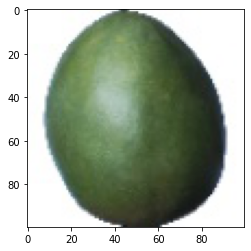

In [8]:
samplePath = pathlib.Path("../input/fruit-recognition/train/train/Mango/Mango_1.jpg")

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

plt.imshow(image)
image = np.array(image)
image = image / 255.0
image = image.reshape(1,imageWidth,imageHeight,3)
predictions = model.predict(image)
predictions
score = tf.nn.softmax(predictions[0])
print("This image is {} with a {:.2f} %".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))